# Chapter 8

## Section 8.1: The No-Cloning Theorem

In [1]:
# Listing 8.1: Copying a variable
my_var = 1
copy_of_my_var = my_var
print (my_var, copy_of_my_var)

1 1


## Section 8.2: How To Solve A Problem WithQuantum Computing

In [4]:
# Listing 8.2: Deutsch's algorithm
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, Aer, execute
from qiskit.visualization import plot_histogram

def solve(oracle):
    """
    A reusable function that identifies whether the oracle represents
    a constant or a balanced function.
    """

    qu = QuantumRegister(2)
    cl = ClassicalRegister(1)

    # initialize the circuit
    qc = QuantumCircuit(qu,cl)

    # Prepare the input state of the oracle
    qc.x(1)
    
    qc.h(0)
    qc.h(1)

    # Apply the Oracle
    oracle(qc)

    # Prepare the output state
    qc.h(0)

    # measure qubit-0
    qc.measure(qu[0], cl[0])

    # Tell Qiskit how to simulate our circuit
    backend = Aer.get_backend('qasm_simulator')

    # execute the qc
    results = execute(qc,backend, shots = 1000).result().get_counts()

    # plot the results
    return plot_histogram(results)

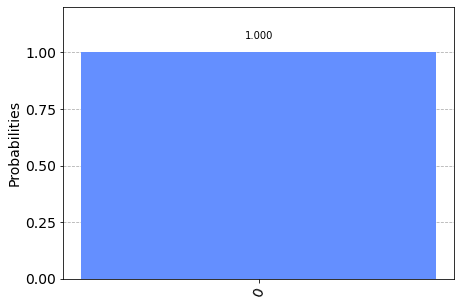

In [5]:
# Listing 8.3: Apply the gate o‐0
def o_0(qc):
    pass

solve(o_0)

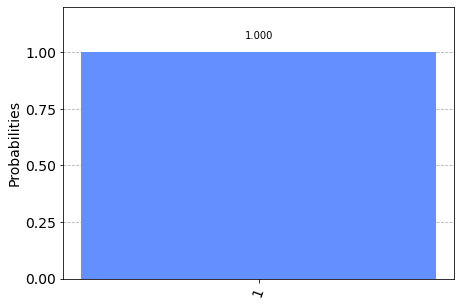

In [6]:
# Listing 8.4: Apply the gate o‐1
def o_1(qc):
    qc.cx(0,1)

solve(o_1)

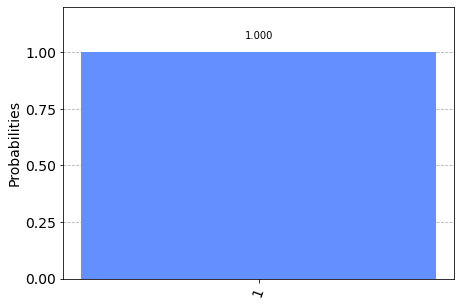

In [7]:
# Listing 8.5: Apply the gate o‐2
def o_2(qc):
    qc.x(0)
    qc.cx(0,1)
    qc.x(0)

solve(o_2)

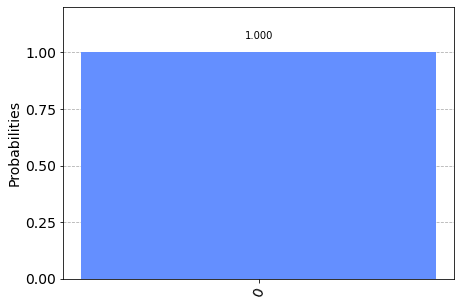

In [8]:
# Listing 8.6: Apply the gate o‐3
def o_3(qc):
    qc.x(1)

solve(o_3)

In [9]:
# Listing 8.7: The code the magician created
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def run_with_oracle(oracle):

    # Create a quantum circuit with one qubit
    qc = QuantumCircuit(1) 

    # toss the coin
    qc.h(0)

    # apply the oracle
    oracle(qc)

    # catch the coin
    qc.h(0)

    # Tell Qiskit how to simulate our circuit
    backend = Aer.get_backend('statevector_simulator')

    # Do the simulation, returning the result
    result = execute(qc,backend).result() 

    # get the probability distribution
    return result.get_counts()

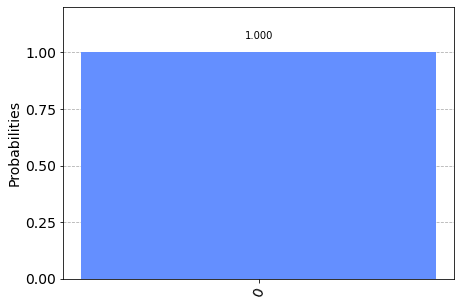

In [10]:
# Listing 8.8: Run the heads up prediction
plot_histogram(run_with_oracle(lambda qc: qc.i(0)))

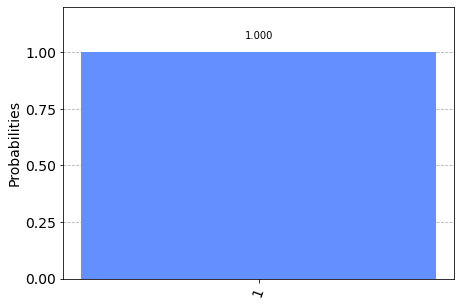

In [11]:
# Listing 8.9: Run the tails up prediction
from math import pi
plot_histogram(run_with_oracle(lambda qc: qc.ry(pi, 0)))